In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset_97KB = '/content/drive/MyDrive/Colab Notebooks/hair_loss_97KB.csv'
dataset_24KB = '/content/drive/MyDrive/Colab Notebooks/hair_loss_24KB.csv'

df2 = pd.read_csv(dataset_97KB)
df4 = pd.read_csv(dataset_24KB)

In [54]:
df2.head()

,ID,Age,Gender,HairType,HealthCondition,StressLevel,SleepHours,HairLossPerDay,HairLossPerMonth,HairLossPerYear
0,1,56,Male,Straight,Healthy,2,7.0,82,2496,29930
1,2,40,Female,Wavy,Thyroid,1,7.6,156,4748,56940
2,3,49,Male,Wavy,Anemia,9,6.9,205,6240,74825
3,4,52,Female,Wavy,Healthy,2,6.0,72,2191,26280
4,5,57,Male,Wavy,Other,8,5.0,140,4261,51100


In [55]:
df2.describe()

,ID,Age,StressLevel,SleepHours,HairLossPerDay,HairLossPerMonth,HairLossPerYear
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,43.912000,5.60200,6.571300,116.737500,3553.015000,42609.187500
std,577.494589,15.114115,2.88006,1.420893,40.439229,1230.966947,14760.318663
min,1.000000,18.000000,1.00000,4.000000,42.000000,1278.000000,15330.000000
25%,500.750000,31.000000,3.00000,5.400000,86.000000,2617.000000,31390.000000
50%,1000.500000,44.500000,6.00000,6.600000,111.000000,3378.000000,40515.000000
75%,1500.250000,57.000000,8.00000,7.800000,140.000000,4261.000000,51100.000000
max,2000.000000,70.000000,10.00000,9.000000,239.000000,7275.000000,87235.000000


In [56]:
# Clean column names
df2.columns = df2.columns.str.strip()

# Define columns to drop
columns_to_drop = ['ID', 'HairLossPerMonth', 'HairLossPerYear', 'HairType']

# Drop only columns that exist
df2 = df2.drop(columns=[col for col in columns_to_drop if col in df2.columns])

df2 = df2.rename(columns={
    'HairLossPerDay': 'HairLoss',
    'HealthCondition': 'MedicalConditionType'
})

# Create the new 'MedicalCondition' column
df2['MedicalCondition'] = df2['MedicalConditionType'].apply(lambda x: 'No' if x == 'Healthy' else 'Yes')

# Preview the cleaned DataFrame
df2.head()

,Age,Gender,MedicalConditionType,StressLevel,SleepHours,HairLoss,MedicalCondition
0,56,Male,Healthy,2,7.0,82,No
1,40,Female,Thyroid,1,7.6,156,Yes
2,49,Male,Anemia,9,6.9,205,Yes
3,52,Female,Healthy,2,6.0,72,No
4,57,Male,Other,8,5.0,140,Yes


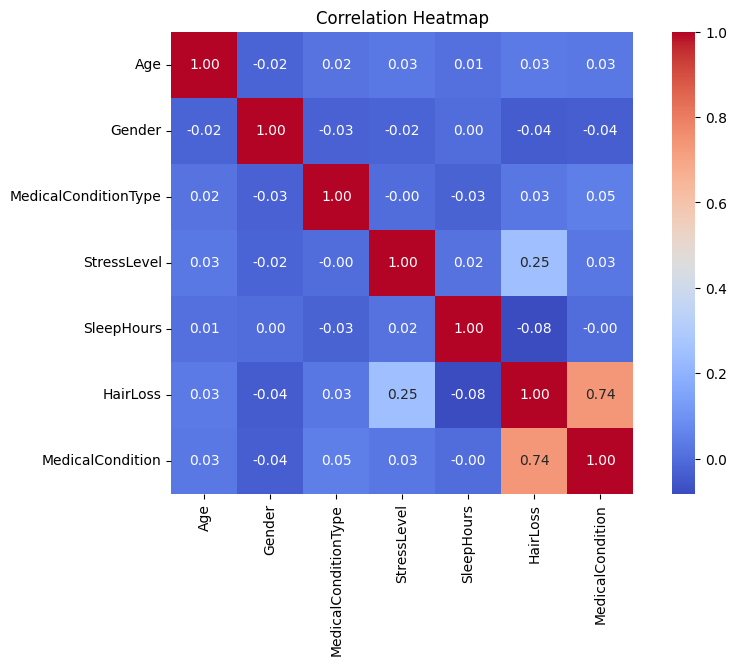

In [57]:
# Make a copy of df2 for encoding
df2_encoded = df2.copy()

# Convert only object columns to numeric codes in the copy
for col in df2_encoded.columns:
    if df2_encoded[col].dtype == 'object':
        df2_encoded[col] = df2_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr = df2_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

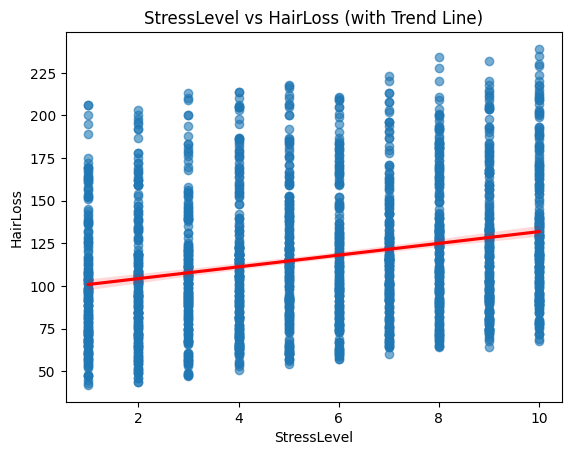

In [58]:
sns.regplot(data=df2, x='StressLevel', y='HairLoss', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('StressLevel vs HairLoss (with Trend Line)')
plt.xlabel('StressLevel')
plt.ylabel('HairLoss')
plt.show()

In [59]:
#for df2 in column HairLoss if value is between 0 to 111 then change it to 0 and if value is more than 111 then change it to 1
df2['HairLoss'] = df2['HairLoss'].apply(lambda x: 0 if 0 <= x <= 111 else 1)

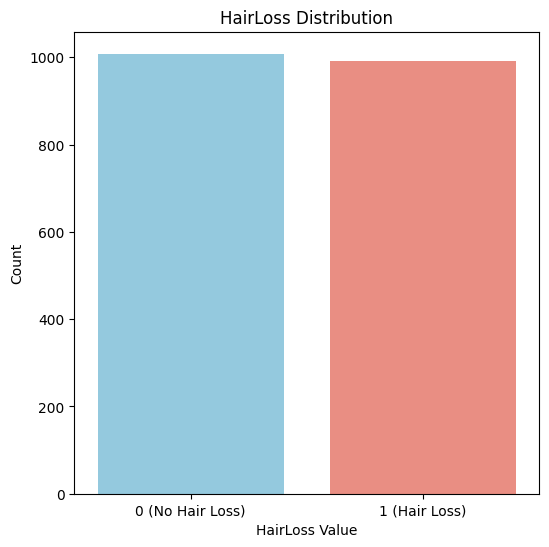

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recalculate hairloss_counts from the relevant DataFrame (e.g., df2, df4, or merged_df)
hairloss_counts = df2['HairLoss'].value_counts().sort_index()

# Convert to DataFrame for Seaborn compatibility
hairloss_df = hairloss_counts.reset_index()
hairloss_df.columns = ['HairLoss', 'Count']
hairloss_df['HairLoss'] = hairloss_df['HairLoss'].astype(str)  # Needed for hue

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(data=hairloss_df, x='HairLoss', y='Count', hue='HairLoss',
            palette=['skyblue', 'salmon'], legend=False)

plt.title('HairLoss Distribution')
plt.xlabel('HairLoss Value')
plt.ylabel('Count')
plt.xticks([0, 1], ['0 (No Hair Loss)', '1 (Hair Loss)'])
plt.show()

In [117]:
df4 = pd.read_csv(dataset_24KB)

In [63]:
df4.head()

,Timestamp,What is your name ?,What is your age ?,What is your gender ?,Do you have hair fall problem ?,Is there anyone in your family having a hair fall problem or a baldness issue?,Did you face any type of chronic illness in the past?,Do you stay up late at night?,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,"Do you use chemicals, hair gel, or color in your hair?",Do you have anemia?,Do you have too much stress,What is your food habit
0,5/22/2023 10:35:54,Mahfuj Sikder Arnob,22,Male,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Both
1,5/23/2023 10:34:34,Tonmoy,18,Male,No,No,No,No,No,Yes,Yes,No,No,Both
2,5/23/2023 10:35:38,Sayeed Dewan,25,Male,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Both
3,5/23/2023 10:37:05,Abdullah,17,Male,No,No,No,Yes,No,Yes,No,Yes,Yes,Both
4,5/24/2023 10:23:09,Jamal Hasan,28,Male,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Nutritious


In [64]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 14 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Timestamp                                                                       716 non-null    object
 1   What is your name ?                                                             716 non-null    object
 2   What is your age ?                                                              716 non-null    int64 
 3   What is your gender ?                                                           716 non-null    object
 4   Do you have hair fall problem ?                                                 716 non-null    object
 5   Is there anyone in your family having a hair fall problem or a baldness issue?  716 non-null    object
 6   Did you face any type of c

In [65]:
df4.describe()

,What is your age ?
count,716.000000
mean,24.121508
std,8.446825
min,15.000000
25%,21.000000
50%,24.000000
75%,27.000000
max,218.000000


In [118]:
df4 = df4[df4['What is your age ?'] <= 100]

In [119]:
# Clean column names (strip spaces and standardize)
df4.columns = df4.columns.str.strip()

# Define the columns to drop
columns_to_drop = [
    'Timestamp',
    'What is your name ?',
    'Do you think that in your area water is a reason behind hair fall problems?',
    'What is your food habit'
]

# Drop only the columns that exist in the DataFrame
df4 = df4.drop(columns=[col for col in columns_to_drop if col in df4.columns])
df4 = df4.rename(columns={
    'What is your age ?': 'Age',
    'What is your gender ?': 'Gender',
    'Do you have hair fall problem ?': 'HairLoss',
    'Is there anyone in your family having a hair fall problem or a baldness issue?': 'Genetics',
    'Did you face any type of chronic illness in the past?': 'MedicalCondition',
    'Do you use chemicals, hair gel, or color in your hair?': 'PoorHairCare',
    'Do you have anemia?': 'MedicalConditionType',
    'Do you have too much stress': 'StressLevel'
})

In [120]:
# Create the new 'MedicalCondition' column
df4['MedicalConditionType'] = df4['MedicalConditionType'].apply(lambda x: 'Anemia' if x == 'Yes' else 'Healthy')

# Apply the conditional update
df4.loc[
    (df4['MedicalCondition'].str.lower() == 'yes') &
    (df4['MedicalConditionType'].str.lower() == 'healthy'),
    'MedicalConditionType'
] = 'Other'
df4.loc[
    (df4['MedicalCondition'].str.lower() == 'no') &
    (df4['MedicalConditionType'].str.lower() == 'anemia'),
    'MedicalCondition'
] = 'Yes'

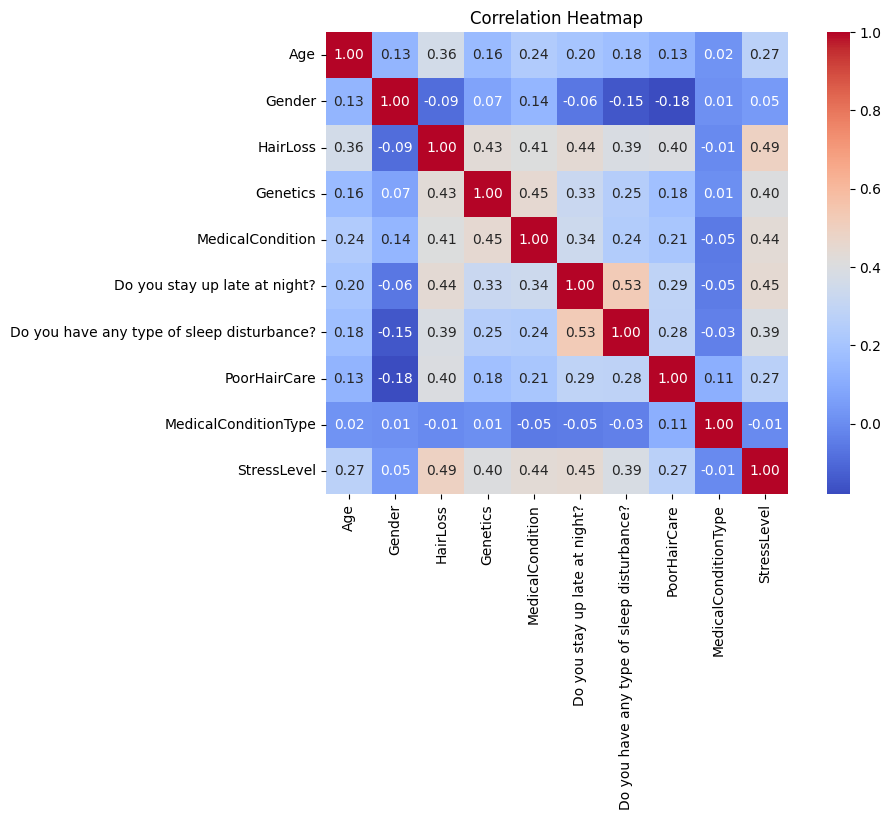

In [121]:
# Make a copy of df4 for encoding
df_encoded = df4.copy()

# Convert only object columns to numeric codes in the copy
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [122]:
df4['Do you stay up late at night?'] = df4['Do you stay up late at night?'].str.strip().str.title()
df4['Do you have any type of sleep disturbance?'] = df4['Do you have any type of sleep disturbance?'].str.strip().str.title()

# Define the logic function for SleepHours
def calculate_sleep_hours(row):
    if row['Do you stay up late at night?'] == 'No' and row['Do you have any type of sleep disturbance?'] == 'No':
        return 8.0
    elif row['Do you stay up late at night?'] == 'No' and row['Do you have any type of sleep disturbance?'] == 'Yes':
        return 7.1
    elif row['Do you stay up late at night?'] == 'Yes' and row['Do you have any type of sleep disturbance?'] == 'No':
        return 6.1
    elif row['Do you stay up late at night?'] == 'Yes' and row['Do you have any type of sleep disturbance?'] == 'Yes':
        return 5.1
    else:
        return None

# Apply the logic and create the new column
df4['SleepHours'] = df4.apply(calculate_sleep_hours, axis=1)

In [123]:
# Define columns to drop
columns_to_drop = [
    'Do you stay up late at night?',
    'Do you have any type of sleep disturbance?'
]

# Drop only existing columns
df4 = df4.drop(columns=[col for col in columns_to_drop if col in df4.columns])

df4.head()

,Age,Gender,HairLoss,Genetics,MedicalCondition,PoorHairCare,MedicalConditionType,StressLevel,SleepHours
0,22,Male,Yes,Yes,Yes,No,Anemia,Yes,6.1
1,18,Male,No,No,No,Yes,Healthy,No,8.0
2,25,Male,Yes,Yes,Yes,No,Other,Yes,8.0
3,17,Male,No,No,Yes,No,Anemia,Yes,6.1
4,28,Male,No,Yes,Yes,No,Anemia,Yes,6.1


In [124]:
# Strip whitespace and title-case all entries for consistency
df4['StressLevel'] = df4['StressLevel'].str.strip().str.title()

# Replace specific typo
df4['StressLevel'] = df4['StressLevel'].replace('\\No', 'No')

# Map 'StressLevel' before converting categorical columns
df4['StressLevel'] = df4['StressLevel'].map({'Yes': 8, 'No': 2}).astype(int)

df4.head()

,Age,Gender,HairLoss,Genetics,MedicalCondition,PoorHairCare,MedicalConditionType,StressLevel,SleepHours
0,22,Male,Yes,Yes,Yes,No,Anemia,8,6.1
1,18,Male,No,No,No,Yes,Healthy,2,8.0
2,25,Male,Yes,Yes,Yes,No,Other,8,8.0
3,17,Male,No,No,Yes,No,Anemia,8,6.1
4,28,Male,No,Yes,Yes,No,Anemia,8,6.1


In [125]:
# HairLoss value from 'Yes' to 1 and 'No' to 0

df4['HairLoss'] = df4['HairLoss'].map({'Yes': 1, 'No': 0})
df4.head()

,Age,Gender,HairLoss,Genetics,MedicalCondition,PoorHairCare,MedicalConditionType,StressLevel,SleepHours
0,22,Male,1,Yes,Yes,No,Anemia,8,6.1
1,18,Male,0,No,No,Yes,Healthy,2,8.0
2,25,Male,1,Yes,Yes,No,Other,8,8.0
3,17,Male,0,No,Yes,No,Anemia,8,6.1
4,28,Male,0,Yes,Yes,No,Anemia,8,6.1


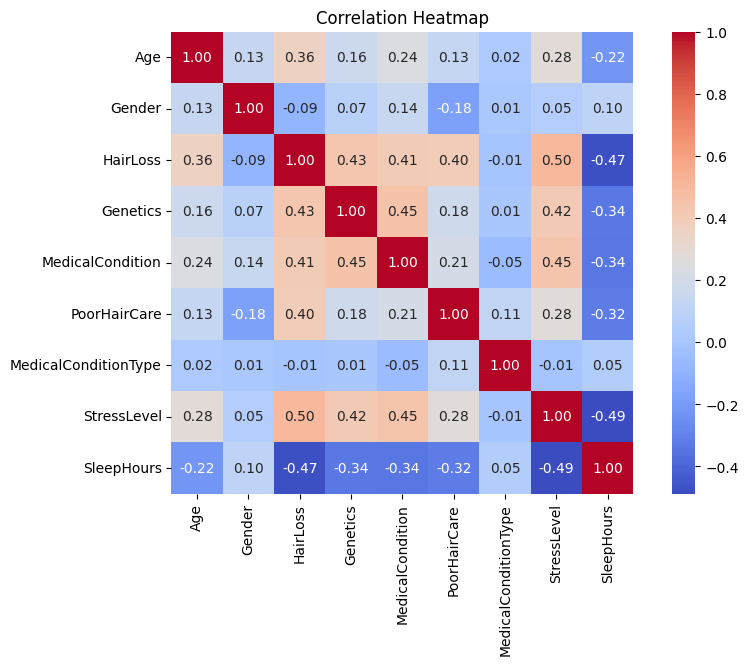

In [126]:
# Make a copy of df4 for encoding
df_encoded = df4.copy()

# Convert only object columns to numeric codes in the copy
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


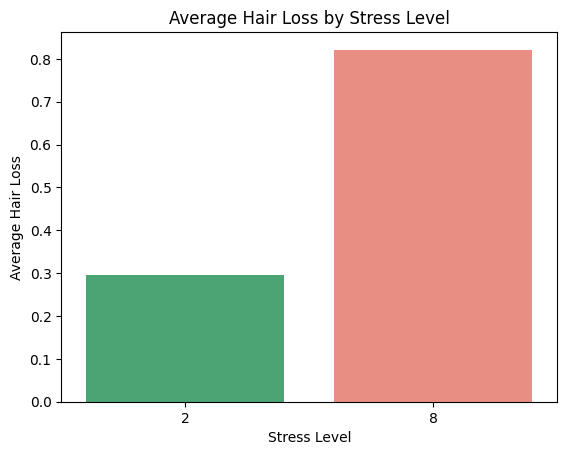

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a fresh copy to work with
df_barplot = df4.copy()

# Ensure StressLevel is integer or category
df_barplot['StressLevel'] = df_barplot['StressLevel'].astype(str)

# Group by StressLevel and calculate mean HairLoss
mean_values = df_barplot.groupby('StressLevel')['HairLoss'].mean().reset_index()

# Plot bar chart with hue and no legend to avoid future warning
sns.barplot(
    data=mean_values,
    x='StressLevel',
    y='HairLoss',
    hue='StressLevel',
    palette=['mediumseagreen', 'salmon'],
    legend=False
)

plt.title('Average Hair Loss by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Hair Loss')
plt.show()


In [128]:
# Identify common columns
common_cols = list(set(df2.columns) & set(df4.columns))

# Select only the common columns from each dataframe
df2_common = df2[common_cols]
df4_common = df4[common_cols]

# Concatenate the two dataframes vertically
merged_df = pd.concat([df2_common, df4_common], ignore_index=True)

merged_df.head()

,StressLevel,MedicalCondition,HairLoss,MedicalConditionType,Gender,SleepHours,Age
0,2,No,0,Healthy,Male,7.0,56
1,1,Yes,1,Thyroid,Female,7.6,40
2,9,Yes,1,Anemia,Male,6.9,49
3,2,No,0,Healthy,Female,6.0,52
4,8,Yes,1,Other,Male,5.0,57


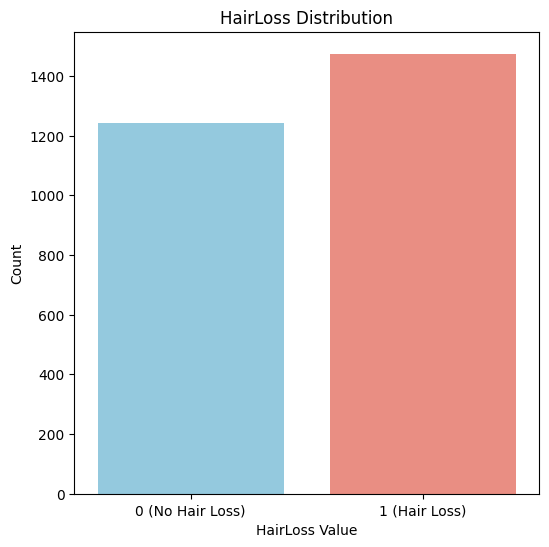

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get counts and convert to DataFrame
hairloss_counts = merged_df['HairLoss'].value_counts().sort_index()
hairloss_df = hairloss_counts.reset_index()
hairloss_df.columns = ['HairLoss', 'Count']
hairloss_df['HairLoss'] = hairloss_df['HairLoss'].astype(str)

# Plot with hue to avoid future warning
plt.figure(figsize=(6, 6))
sns.barplot(data=hairloss_df, x='HairLoss', y='Count', hue='HairLoss',
            palette=['skyblue', 'salmon'], legend=False)

plt.title('HairLoss Distribution')
plt.xlabel('HairLoss Value')
plt.ylabel('Count')
plt.xticks([0, 1], ['0 (No Hair Loss)', '1 (Hair Loss)'])
plt.show()

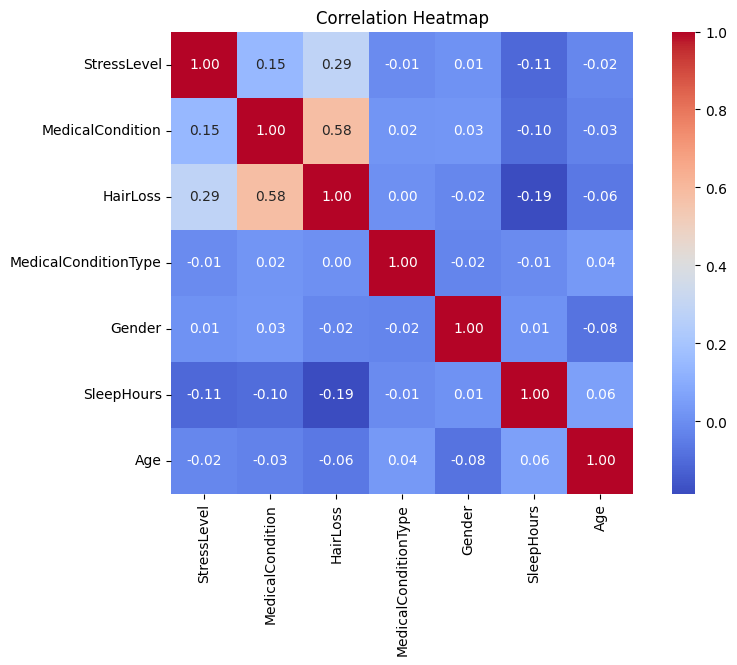

In [130]:
# Make a copy of df4 for encoding
df_encoded = merged_df.copy()

# Convert only object columns to numeric codes in the copy
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


In [139]:
# For MedicalCondition, 'Yes' is 1 and 'No' is 0
merged_df['MedicalCondition'] = merged_df['MedicalCondition'].map({'No': 0, 'Yes': 1})

# Categorical (nominal): one-hot encoding
merged_df = pd.get_dummies(merged_df, columns=['Gender'], drop_first=True)
merged_df['Gender_Male'] = merged_df['Gender_Male'].astype(int)

merged_df.head()

,StressLevel,MedicalCondition,HairLoss,MedicalConditionType,SleepHours,Age,Gender_Male
0,2,0,0,Healthy,7.0,56,1
1,1,1,1,Thyroid,7.6,40,0
2,9,1,1,Anemia,6.9,49,1
3,2,0,0,Healthy,6.0,52,0
4,8,1,1,Other,5.0,57,1


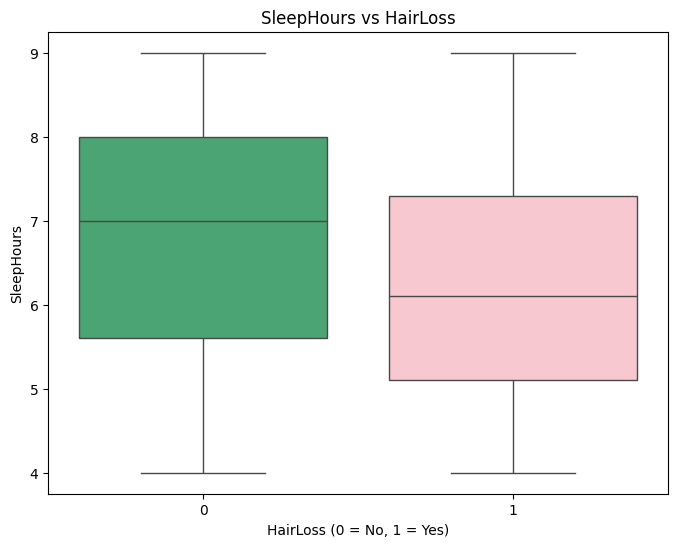

In [140]:
plt.figure(figsize=(8, 6))

# Convert HairLoss to string for categorical hue
merged_df['HairLoss'] = merged_df['HairLoss'].astype(str)

sns.boxplot(
    x='HairLoss',
    y='SleepHours',
    data=merged_df,
    hue='HairLoss',  # Same as x
    palette=['mediumseagreen', 'pink'],
    legend=False
)

plt.title('SleepHours vs HairLoss')
plt.xlabel('HairLoss (0 = No, 1 = Yes)')
plt.ylabel('SleepHours')
plt.show()


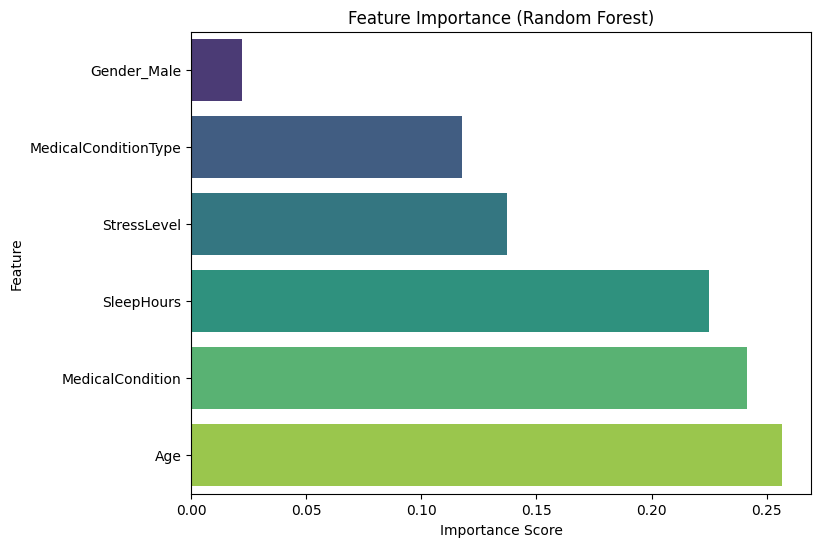

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Select features and target
features = ['Gender_Male', 'MedicalConditionType', 'StressLevel', 'SleepHours', 'MedicalCondition', 'Age']
X = merged_df[features].copy()
y = merged_df['HairLoss']

# Encode Categorical Features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])  # Use .loc for safe assignment

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Create a DataFrame of feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Step 6: Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(
    data=feature_importance_df,
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='viridis',
    legend=False
)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


<Figure size 600x600 with 0 Axes>

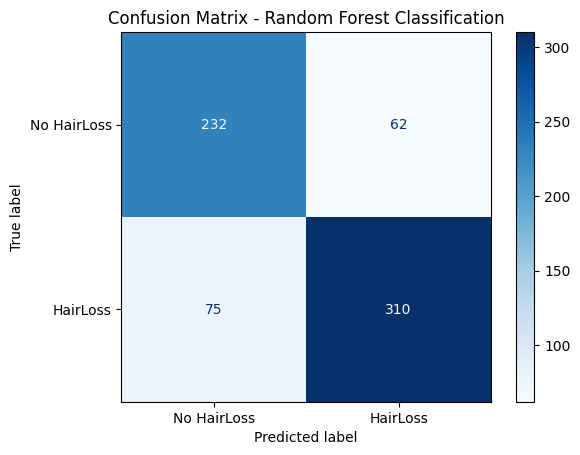

True Negatives: 232
False Positives: 62
False Negatives: 75
True Positives: 310


In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict and Confusion Matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No HairLoss", "HairLoss"])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest Classification')
plt.grid(False)
plt.show()

# Extract confusion matrix values
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

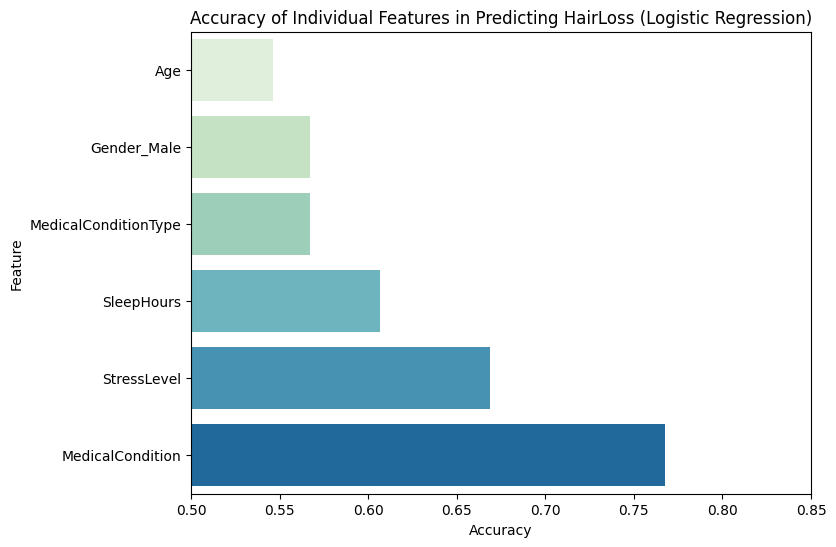

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Safely copy the features and target
features = ['Gender_Male', 'MedicalConditionType', 'StressLevel', 'SleepHours', 'MedicalCondition', 'Age']
X = merged_df[features].copy()
y = merged_df['HairLoss']

# Encode categorical features safely
for col in X.select_dtypes(include='object').columns:
    X.loc[:, col] = LabelEncoder().fit_transform(X[col])

# Evaluate individual feature accuracy
individual_accuracies = {}

for feature in features:
    X_feat = X[[feature]]
    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feat, y, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_f, y_train_f)
    y_pred = model.predict(X_test_f)

    acc = accuracy_score(y_test_f, y_pred)
    individual_accuracies[feature] = acc

# Convert to DataFrame
accuracy_df = pd.DataFrame.from_dict(individual_accuracies, orient='index', columns=['Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=True).reset_index().rename(columns={'index': 'Feature'})

# Convert Feature to string for hue, and plot
accuracy_df['Feature'] = accuracy_df['Feature'].astype(str)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=accuracy_df,
    x='Accuracy',
    y='Feature',
    hue='Feature',
    palette='GnBu',
    legend=False
)
plt.title('Accuracy of Individual Features in Predicting HairLoss (Logistic Regression)')
plt.xlabel('Accuracy')
plt.ylabel('Feature')
plt.xlim(0.5, 0.85)
plt.show()

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Step 1: Select features and prepare data
features = ['Gender_Male', 'MedicalConditionType', 'StressLevel', 'SleepHours', 'MedicalCondition', 'Age']
X = merged_df[features].copy()
y = merged_df['HairLoss'].astype(int)

# Encode categorical features safely
for col in X.select_dtypes(include='object').columns:
    X.loc[:, col] = LabelEncoder().fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#  Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
rf_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]
lr_scores = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr)
]

# Preferred model per metric
preferred = ['Random Forest' if rf > lr else 'Logistic Regression'
             for rf, lr in zip(rf_scores, lr_scores)]

# Build Comparison Table
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Random Forest': rf_scores,
    'Logistic Regression': lr_scores,
    'Preferred Model': preferred
})

# Display
print(comparison_df)


      Metric  Random Forest  Logistic Regression      Preferred Model
0   Accuracy       0.798233             0.790869        Random Forest
1  Precision       0.833333             0.858407  Logistic Regression
2     Recall       0.805195             0.755844        Random Forest
3   F1-score       0.819022             0.803867        Random Forest
